In [5]:
import requests as req

In [6]:
url = 'https://steemit.com/tags'

In [7]:
headers = {'user-agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_1 like Mac OS X)'}  

In [9]:
res = req.get(url, headers=headers)

In [10]:
res.status_code

200

In [11]:
res.content

b'<!DOCTYPE html><html lang="en" data-reactroot="" data-reactid="1" data-react-checksum="-1567208436"><head data-reactid="2"><meta charset="utf-8" data-reactid="3"/><meta name="viewport" content="width=device-width, initial-scale=1.0" data-reactid="4"/><meta name="description" content="Steemit is a social media platform where everyone gets paid for creating and curating content. It leverages a robust digital points system (Steem) for digital rewards." data-reactid="5"/><meta property="og:type" content="website" data-reactid="6"/><meta property="og:site_name" content="Steemit" data-reactid="7"/><meta property="og:title" content="Steemit" data-reactid="8"/><meta property="og:description" content="Steemit is a social media platform where everyone gets paid for creating and curating content. It leverages a robust digital points system (Steem) for digital rewards." data-reactid="9"/><meta property="og:image" content="https://steemit.com/images/steemit.png" data-reactid="10"/><meta property=

In [12]:
from bs4 import BeautifulSoup as bs

In [15]:
soup = bs(res.content, 'lxml')

In [16]:
tr_list = soup.find_all('tr')

In [17]:
tr_list[:2]

[<tr data-reactid="175"><th data-reactid="176"><strong data-reactid="177">Tag</strong></th><th data-reactid="178"><a data-reactid="179" href="#">Posts</a></th><th data-reactid="180"><a data-reactid="181" href="#">Comments</a></th><th data-reactid="182"><a data-reactid="183" href="#">Payouts</a></th></tr>,
 <tr data-reactid="185"><td data-reactid="186"><a data-reactid="187" href="/trending/aaa">aaa</a></td><td data-reactid="188">115</td><td data-reactid="189">1,541</td><td data-reactid="190">498.147 SBD</td></tr>]

In [18]:
tags = []
posts = []
comments = []
sbds = []

for tr in tr_list[1:]:
    tds = tr.find_all('td')
    tags.append(tds[0].text)
    posts.append(int(tds[1].text.replace(',','')))
    comments.append(int(tds[2].text.replace(',','')))
    sbds.append(float(tds[3].text.replace(',','')[:-4]))

In [19]:
tags[0]

'aaa'

In [20]:
comments[0]

1541

In [21]:
sbds[0]

498.147

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame(columns=('tag','posts','comments','sbds'))

In [24]:
df.head()

,tag,posts,comments,sbds


In [25]:
for i in range(len(tags)):
    df.loc[i] = [tags[i], posts[i], comments[i], sbds[i]]

In [26]:
df.head()

,tag,posts,comments,sbds
0,aaa,115,1541,498.147
1,actifit,2487,9022,1461.848
2,animals,21,115,61.574
3,appics,3455,10574,1853.191
4,archisteem,2,12,31.226


In [27]:
df = df.set_index(['tag'])

In [28]:
df.head()

,posts,comments,sbds
tag,,,
aaa,115,1541,498.147
actifit,2487,9022,1461.848
animals,21,115,61.574
appics,3455,10574,1853.191
archisteem,2,12,31.226


In [29]:
df['comments_per_post'] = df['comments'] / df['posts']

In [30]:
df.head()

,posts,comments,sbds,comments_per_post
tag,,,,
aaa,115,1541,498.147,13.4
actifit,2487,9022,1461.848,3.62766
animals,21,115,61.574,5.47619
appics,3455,10574,1853.191,3.06049
archisteem,2,12,31.226,6


In [33]:
df2 = df[df['posts'] > 100].sort_values(['comments_per_post'], ascending=[False])

In [34]:
df2.head()

,posts,comments,sbds,comments_per_post
tag,,,,
hive-114105,140,2152,581.858,15.3714
aaa,115,1541,498.147,13.4
deutsch,312,3594,526.062,11.5192
tasteem,307,2796,1963.628,9.10749
steemleo,173,1207,590.692,6.97688


In [35]:
%matplotlib inline

In [36]:
import matplotlib.pyplot as plt

In [37]:
plt.style.use('ggplot')

In [38]:
df2

,posts,comments,sbds,comments_per_post
tag,,,,
hive-114105,140,2152,581.858,15.3714
aaa,115,1541,498.147,13.4
deutsch,312,3594,526.062,11.5192
tasteem,307,2796,1963.628,9.10749
steemleo,173,1207,590.692,6.97688
steemmonsters,115,797,331.143,6.93043
travelfeed,241,1668,1781.156,6.92116
dblog,109,735,44.893,6.74312
creativecoin,124,785,436.994,6.33065


In [39]:
df3 = df2.iloc[:10,[3]]

In [40]:
df3

,comments_per_post
tag,
hive-114105,15.3714
aaa,13.4
deutsch,11.5192
tasteem,9.10749
steemleo,6.97688
steemmonsters,6.93043
travelfeed,6.92116
dblog,6.74312
creativecoin,6.33065


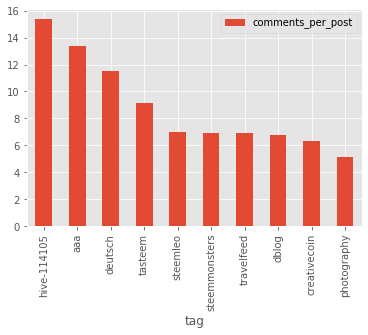

In [41]:
df3.plot(kind='bar')